In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('..\\Datasets\\titanic_train.csv',usecols=['Age','Fare','Survived'])
df.sample()

,Survived,Age,Fare
635,1,28.0,13.0


In [21]:
df.isnull().sum()
# df['Age']

Survived      0
Age         177
Fare          0
dtype: int64

In [22]:
df['Age'].mean()

29.69911764705882

In [23]:
df['Age']=df['Age'].fillna(df['Age'].mean())
# df.iloc[295]

In [24]:
X = df.drop(columns=['Survived'])
y = df['Survived']
# X.sample()

# Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Model before Transformation

In [26]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


In [27]:
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(y_test,y_pred))

Accuracy:  0.664804469273743


In [28]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,scoring='accuracy',cv=10))

0.6565917602996255

# Discretization

In [29]:
from sklearn.preprocessing import KBinsDiscretizer
kbin_age = KBinsDiscretizer(n_bins=25, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=25, encode='ordinal', strategy='quantile')


In [30]:
from sklearn.compose import ColumnTransformer
trf = ColumnTransformer(transformers=[
                        ('first',kbin_age,[0]),
                        ('second',kbin_fare,[1]),
                        ],remainder='passthrough')
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)



C:\Users\Acer1\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\Acer1\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [31]:
print(trf.named_transformers_)
print(trf.named_transformers_['first'])
print(trf.named_transformers_['first'].n_bins_)
print(trf.named_transformers_['first'].bin_edges_)


{'first': KBinsDiscretizer(encode='ordinal', n_bins=25), 'second': KBinsDiscretizer(encode='ordinal', n_bins=25)}
KBinsDiscretizer(encode='ordinal', n_bins=25)
[21]
[array([ 0.42      ,  3.44      , 11.88      , 17.        , 19.        ,
        21.        , 22.        , 24.        , 25.        , 26.        ,
        28.        , 29.69911765, 30.        , 31.48      , 33.        ,
        35.        , 38.        , 42.        , 45.        , 50.        ,
        55.28      , 80.        ])                                      ]


In [32]:
output = pd.DataFrame({
                      'age':X_train['Age'],
                      'age_transformed':X_train_transformed[:,0],
                      'fare':X_train['Fare'],
                      'fare_transformed':X_train_transformed[:,1]
                      })
output.sample()

,age,age_transformed,fare,fare_transformed
11,58.0,20.0,26.55,16.0


# Model after Transformation

In [33]:
clf = DecisionTreeClassifier()
clf.fit(X_train_transformed,y_train)
y_pred = clf.predict(X_test_transformed)
accuracy_score(y_test,y_pred)

0.6983240223463687

In [34]:
X_transformed = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_transformed,y,scoring='accuracy',cv=10))

C:\Users\Acer1\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


0.6498626716604244

# Function

In [35]:
def discretize(bins,strategy):
  kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
  kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)

  trf = ColumnTransformer(transformers=[
                          ('first',kbin_age,[0]),
                          ('second',kbin_fare,[1])
                          ],remainder='passthrough')
  
  X_transformed = trf.fit_transform(X)
  # print(X_transformed.sample())

  X_transformed = pd.DataFrame(X_transformed,columns=X_train.columns)
  
  plt.figure(figsize=(14,4))
  plt.subplot(1,2,1)
  sns.histplot(X['Age'],kde=True,edgecolor=None)
  plt.title('Before: Age')

  plt.subplot(1,2,2)
  sns.histplot(X_transformed[['Age']],kde=True,edgecolor=None)
  plt.title('After: Age')
  plt.show()

  plt.figure(figsize=(14,4))
  plt.subplot(1,2,1)
  sns.histplot(X['Fare'],kde=True,edgecolor=None)
  plt.title('Before: Fare')

  plt.subplot(1,2,2)
  sns.histplot(X_transformed[['Fare']],kde=True,edgecolor=None)
  plt.title('After: Fare')
  plt.show()

  print(np.mean(cross_val_score(DecisionTreeClassifier(),X_transformed,y,scoring='accuracy',cv=10)))

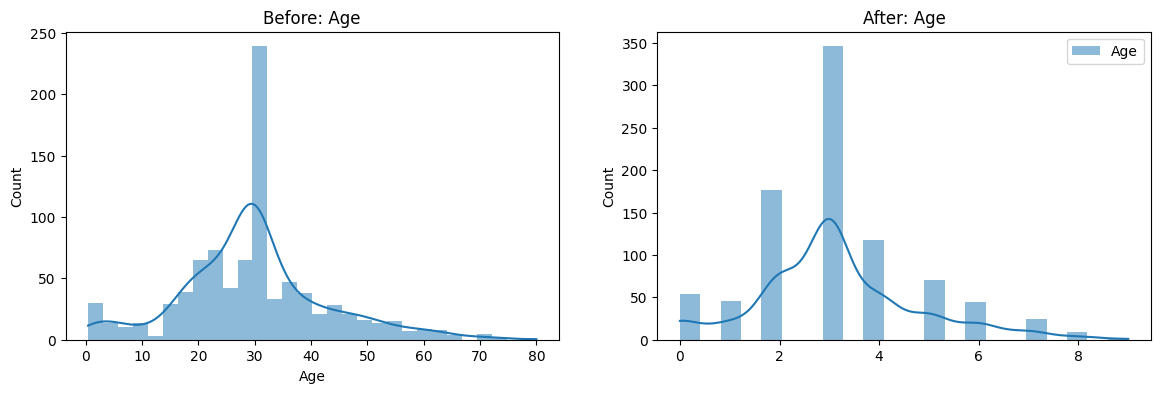

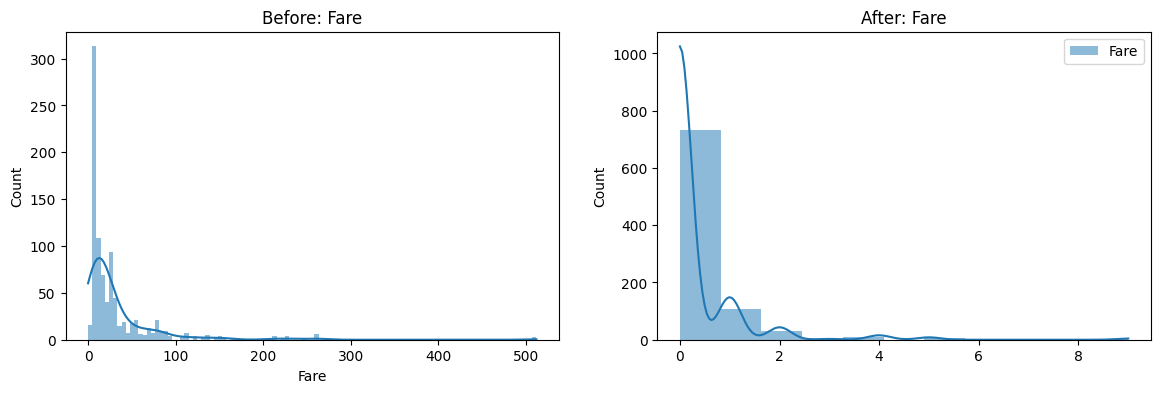

0.6959675405742821


In [37]:
discretize(10,'uniform')